In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import unittest
import tqdm.notebook as tq
import solitaire_env
import sys
import seaborn as sns
sys.setrecursionlimit(10**6)

In [2]:
# import time
# start = time.time()


# count = 0
# actions = [0]*6
# fail = [0]*6
# different_states = []
# for j in tqdm(range(1000)):
#     en = solitaire_env.env()
#     for i in range(10000):

#         action = random.sample(range(6),1)[0]
        
#         actions[action]+=1

#         won,failed = en.step(action)
        
#         if failed:
#             fail[action]+=1
#         #print(i+1,action,won)
#         if won == True:
#             count+=1
#             break
#     different_states.append(len(en.hashable_map.keys()))

# print(count)
#print(time.time()-start)

In [3]:
#en.get_pile()

In [4]:
#en.get_foundation()

In [5]:
#en.get_tableau()

In [26]:

start = time.time()


count = 0

number_of_games = 800

action_type = {0:'tableau_to_foundation_reveal',\
               1:'to_foundation_stack',2:'tableau_to_tableau_reveal',\
               3:'pile_to_tableau',\
                4:'foundation_to_tableau',\
               5:'tableau_to_tableau_not_reveal'\
              }


actions_for_each_game = [0]*number_of_games
iterations_used_per_game = [0]*number_of_games
different_states_per_game = [0]*number_of_games

def greedy_policy(en,action_number,tot,action_freq,actions_matrix,game,fp_flag=False):
    
#     if action_number >= tot:
#         return False


    actions_m = []
    
    for step in range(tot):
        
        for action in range(6):
            
            won,taken = en.step(action,fp_flag)
            
             
            if won == True:
                action_freq[action]+=1
                actions_m.append(action)
                
                
                actions_matrix[game] = [game,actions_m,en.state] 
                return step,True
            if taken == True:
                action_freq[action]+=1
                actions_m.append(action)
                
                break

        if taken == False:
            
            actions_matrix[game] = [game,actions_m,en.state] 
            
            return step,False
        
       
    actions_matrix[game] = [game,actions_m,en.state] 
    
    
    
    return step,False
        
        
actions_matrix = [0]*number_of_games



for this_game in tq.tqdm(range(number_of_games)):
    
    
    en = solitaire_env.env()
    tot = 20000
    action_freq = {0:0,1:0,2:0,3:0,4:0,5:0}
    
    step,won = greedy_policy(en,1,tot,action_freq,actions_matrix,this_game)
             
    if won == True:
        count+=1
        
    actions_for_each_game[this_game] = action_freq
    different_states_per_game[this_game] = len(en.hashable_map.keys())
    iterations_used_per_game[this_game] = step
    
print(time.time()-start)


5040.0710978508


In [27]:
count


0

In [28]:
len(actions_matrix[0][1])

10

In [29]:
action_count = [len(actions_matrix[i][1]) for i in range(number_of_games)]

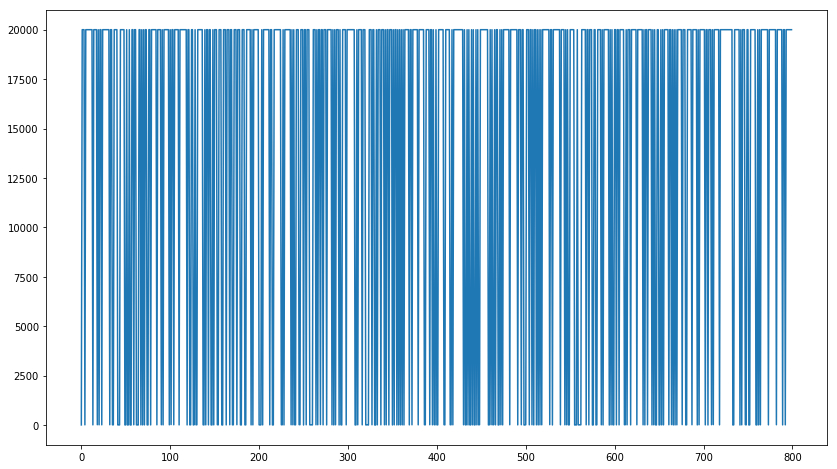

In [30]:
plt.figure(figsize=(14,8))
plt.plot(range(number_of_games),action_count)

In [31]:
actions_matrix.sort(key = lambda x:len(x[1]))

In [32]:
actions_matrix[0]

[331, [3, 3, 3, 3], <solitaire_env.state at 0x7fd70f9fa518>]

In [34]:
actions_matrix[0][2]

In [37]:
en = solitaire_env.env()
en.state = actions_matrix[0][2]

In [38]:
en.get_foundation()

printing foundation number 1 ********************
printing foundation number 2 ********************
printing foundation number 3 ********************
printing foundation number 4 ********************


In [39]:
en.get_pile()

suit = diamond    color = red        number =     7 speciality = None       face = up   
suit = heart      color = red        number =     7 speciality = None       face = up   
suit = heart      color = red        number =     8 speciality = None       face = up   
suit = spade      color = black      number =    11 speciality = JACK       face = up   
suit = club       color = black      number =    11 speciality = JACK       face = up   
suit = heart      color = red        number =    10 speciality = None       face = up   
suit = club       color = black      number =     9 speciality = None       face = up   
suit = club       color = black      number =     8 speciality = None       face = up   
suit = spade      color = black      number =    12 speciality = QUEEN      face = up   
suit = club       color = black      number =     6 speciality = None       face = up   
suit = spade      color = black      number =     9 speciality = None       face = up   
suit = diamond    col

In [40]:
en.get_tableau()

printing tableau number 1 ********************
suit = diamond    color = red        number =     2 speciality = None       face = up   
printing tableau number 2 ********************
suit = spade      color = black      number =     3 speciality = None       face = up   
suit = spade      color = black      number =    13 speciality = KING       face = up   
printing tableau number 3 ********************
suit = spade      color = black      number =     5 speciality = None       face = up   
suit = diamond    color = red        number =     9 speciality = None       face = up   
suit = club       color = black      number =    12 speciality = QUEEN      face = up   
suit = diamond    color = red        number =    11 speciality = JACK       face = up   
suit = spade      color = black      number =    10 speciality = None       face = up   
printing tableau number 4 ********************
suit = spade      color = black      number =     2 speciality = None       face = up   
suit = diam

In [41]:
it = pd.DataFrame(data = {"iterations":iterations_used_per_game})['iterations'].value_counts()

In [42]:
it

19999    552
15        30
13        25
14        22
16        22
18        16
12        16
11        16
10        16
9         15
17        11
8          8
20         8
19         8
21         7
6          7
7          5
22         4
25         3
24         3
23         2
27         2
26         1
4          1
Name: iterations, dtype: int64

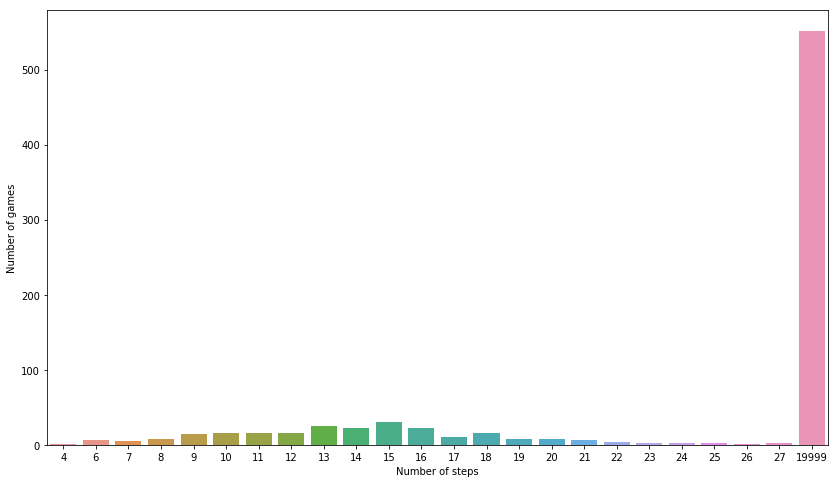

In [43]:
plt.figure(figsize=(14,8))
plt.xlabel("Number of steps")
plt.ylabel("Number of games")
sns.barplot(it.index,it.values)
plt.savefig("Foundation_Progression_included.jpg")

[1, 9, 2, 15, 2, 2]


<BarContainer object of 6 artists>

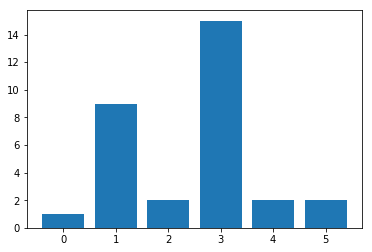

In [24]:
x = 10
mp = actions_for_each_game[x]
values = [mp[i] for i in range(6)]
print(values)
plt.bar([0,1,2,3,4,5],values)

In [43]:
en.get_foundation()

printing foundation number 1 ********************
suit = club       color = black      number =     1 speciality = ACE        face = up   
printing foundation number 2 ********************
printing foundation number 3 ********************
suit = diamond    color = red        number =     1 speciality = ACE        face = up   
printing foundation number 4 ********************


In [ ]:
Hashing function improve

look for sets

Graph Representation for neural net

